# Problem Definition

Mencari Insight dari dataset perusahaan E-commerce yang bernama BukaPedia menggunakan pengolahan Machine Learning.

Menentukan algoritma yang akan digunakan untuk menjawab pertanyaan 'Bagaimana cara untuk mempertahankan kualitas produk dan meningkatkan profit perusahaan?'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.metrics import mean_squared_error

# Data Acquisition

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/tugas/final_project.csv')

In [ ]:
df

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold,rating,shop_name,subcategory,title,url
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,0,55000,284008675,0,5,Openshop,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,0,65000,283976385,0,5,Openshop,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,0,59000,316717554,0,5,joZFashion,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,0,59000,270887764,0,5,Openshop,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,0,55000,284010469,0,5,Openshop,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,0,131500,366339754,99,5,Toko Adela Aloysius,Sweater,Couple Sweater Pasangan Wanita Pria Baju Atasa...,https://www.tokopedia.com/adelaaloysius1/coupl...
4499,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,0,239900,363772675,99,5,Toko Wisly Wis,Jumpsuit,Jumpsuit Jumbo Wanita Bigsize Big Size Panjang...,https://www.tokopedia.com/tokowislywis/jumpsui...
4500,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,31,0,Jakarta,0,105000,358247047,99,5,Strong Woman,Kemeja,Baju Kemeja Wanita Jumbo Bigsize Big Size Leng...,https://www.tokopedia.com/strongwoman/baju-kem...
4501,Fashion Wanita,Kota Tangerang Selatan,True,https://ecs7.tokopedia.net/img/cache/200-squar...,18,0,Kota Tangerang Selatan,0,50000,335503058,99,5,Michary Shop,Daster,Daster Tanktop Dress Tanktop Baju Tidur Wanita,https://www.tokopedia.com/mamanacaca/daster-ta...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4503 entries, 0 to 4502
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   category           4503 non-null   object
 1   city               4503 non-null   object
 2   gold_merchant      4503 non-null   bool  
 3   image_url          4503 non-null   object
 4   jumlah_review      4503 non-null   int64 
 5   jumlah_view        4503 non-null   object
 6   location           4503 non-null   object
 7   presentase_diskon  4503 non-null   int64 
 8   price              4503 non-null   int64 
 9   product_id         4503 non-null   int64 
 10  quantity_sold      4503 non-null   int64 
 11  rating             4503 non-null   int64 
 12  shop_name          4503 non-null   object
 13  subcategory        4503 non-null   object
 14  title              4503 non-null   object
 15  url                4503 non-null   object
dtypes: bool(1), int64(6), object(9)
memory usa

In [ ]:
df.isnull().sum()

,0
category,0
city,0
gold_merchant,0
image_url,0
jumlah_review,0
jumlah_view,0
location,0
presentase_diskon,0
price,0
product_id,0


In [ ]:
# Summary statistics for numerical columns
df[['price', 'rating', 'quantity_sold']].describe()

,price,rating,quantity_sold
count,4.503000e+03,4503.000000,4503.000000
mean,9.780626e+04,4.879636,69.367311
std,8.468117e+04,0.339455,252.428009
min,7.500000e+03,0.000000,0.000000
25%,5.490000e+04,5.000000,2.000000
50%,7.800000e+04,5.000000,12.000000
75%,1.190000e+05,5.000000,41.000000
max,2.200000e+06,5.000000,6401.000000


# Data Preprocessing

In [ ]:
import numpy as np

# Calculate Z-scores
df['z_score'] = (df['quantity_sold'] - df['quantity_sold'].mean()) / df['quantity_sold'].std()

# Identify outliers
outliers_z = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
outliers_z

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,quantity_sold,rating,shop_name,subcategory,title,url,z_score
1967,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,109,0,Jakarta,0,88600,322447876,829,5,Nitaku Grosir,Sweater,Sweater Crop Baju Crop Sweater Rajut Wanita Ra...,https://www.tokopedia.com/nitakugrosir/sweater...,3.009304
1968,Fashion Wanita,Kab. Blitar,False,https://ecs7.tokopedia.net/img/cache/200-squar...,44,853,Kab. Blitar,0,54000,353513610,880,5,retye mall,Cardigan,CARDIGAN / JAKET RAJUT / BAJU WANITA / LONG CARDY,https://www.tokopedia.com/retyemall/cardigan-j...,3.211342
1969,Fashion Wanita,Kab. Blitar,False,https://ecs7.tokopedia.net/img/cache/200-squar...,44,0,Kab. Blitar,0,42000,353512157,880,5,retye mall,Blouse,BAJU WANITA / BAJU PENDEK / FASHION WANITA / T...,https://www.tokopedia.com/retyemall/baju-wanit...,3.211342
1970,Fashion Wanita,Kab. Blitar,False,https://ecs7.tokopedia.net/img/cache/200-squar...,44,0,Kab. Blitar,0,58000,353511828,880,5,retye mall,Sweater,BAJU WANITA / SWEATER / BAJU RAJUT / NANAS SWE...,https://www.tokopedia.com/retyemall/baju-wanit...,3.211342
1971,Fashion Wanita,Kab. Blitar,False,https://ecs7.tokopedia.net/img/cache/200-squar...,44,0,Kab. Blitar,0,50000,353512775,880,5,retye mall,Sweater,BAJU WANITA / BAJU RAJUT / SWEATER / ROUNDHAND...,https://www.tokopedia.com/retyemall/baju-wanit...,3.211342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2060,Fashion Wanita,Jakarta,True,https://ecs7.tokopedia.net/img/cache/200-squar...,1231,"90,600",Jakarta,0,53000,246580930,3969,5,Chel&#39;z Shop,Piyama,Baju Tidur Cewek/Wanita Piyama Pajamas Satin M...,https://www.tokopedia.com/chelshopceria/baju-t...,15.448494
2061,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,5,7000,Jakarta,0,199250,211361532,5015,4,chibishop,Maxi Dress,GAUN PANJANG PESTA PARTY MAXI LONG DRESS BAJU ...,https://www.tokopedia.com/chibishopping/gaun-p...,19.592250
2062,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,671,0,Kota Bandung,0,41998,199288388,5443,5,multishop_bdg,Sweater,Boxy premium jumbo | sweater rajut | baju raju...,https://www.tokopedia.com/multishopbdg/boxy-pr...,21.287783
2063,Fashion Wanita,Kota Bandung,False,https://ecs7.tokopedia.net/img/cache/200-squar...,60,0,Kota Bandung,0,97750,353915976,5913,5,Tuasan Store,Blouse,BAJU ATASAN TUNIK WANITA TERBARU JUMBO BLOUSE ...,https://www.tokopedia.com/tuasanstore/baju-ata...,23.149700


Overview of Outliers
1. High Ratings: All listed outliers have a rating of 5, indicating that they are likely high-quality products. This could mean that their high sales performance is driven by customer satisfaction.

2. Sales Volume: The quantity_sold values for some of these products are significantly higher than others, indicating exceptional sales performance.

3. Pricing: The prices of the products vary, with some being relatively low, which might contribute to their high sales volume despite being in a saturated category.

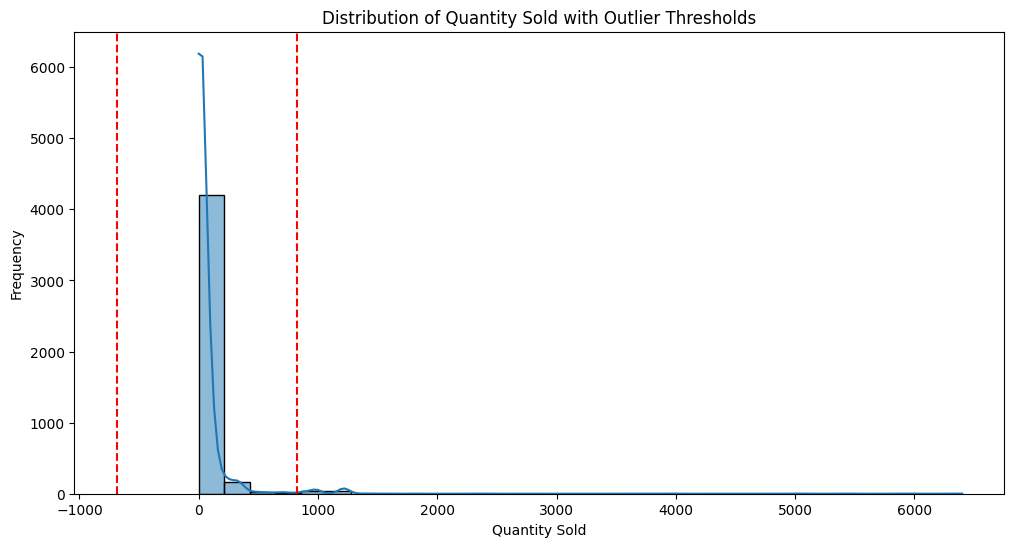

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualization outliers
plt.figure(figsize=(12, 6))
sns.histplot(df['quantity_sold'], bins=30, kde=True)
plt.axvline(x=df['quantity_sold'].mean() + 3 * df['quantity_sold'].std(), color='r', linestyle='--')
plt.axvline(x=df['quantity_sold'].mean() - 3 * df['quantity_sold'].std(), color='r', linestyle='--')
plt.title('Distribution of Quantity Sold with Outlier Thresholds')
plt.xlabel('Quantity Sold')
plt.ylabel('Frequency')
plt.show()

# Exploratory Data Analysis

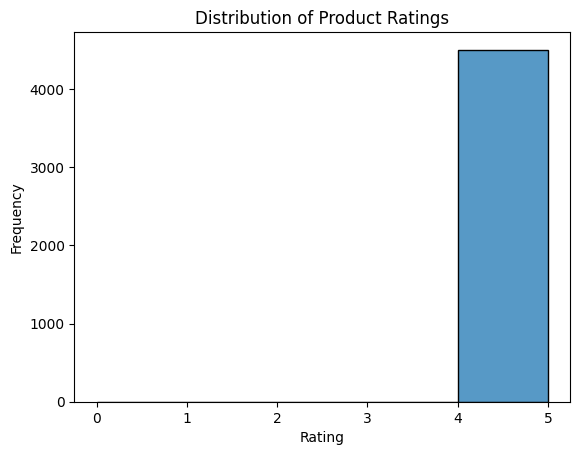

In [ ]:
# Rating distribution
sns.histplot(df['rating'], bins=5, kde=False)
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


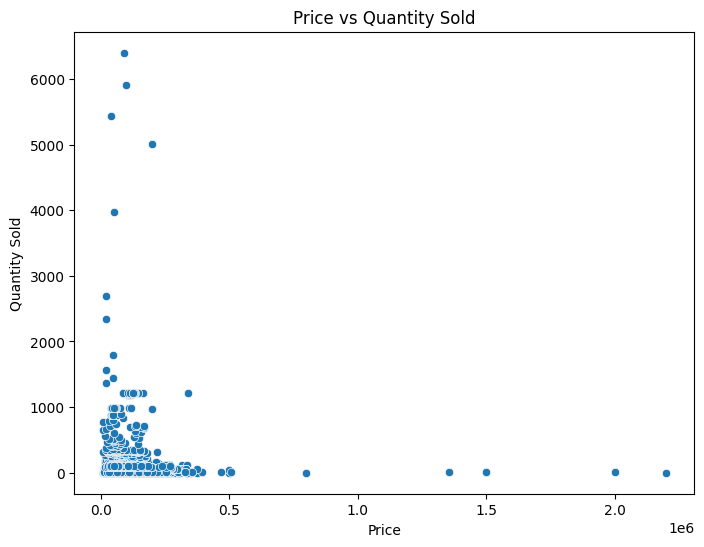

In [ ]:
# Price vs Quantity Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='quantity_sold', data=df)
plt.title('Price vs Quantity Sold')
plt.xlabel('Price')
plt.ylabel('Quantity Sold')
plt.show()


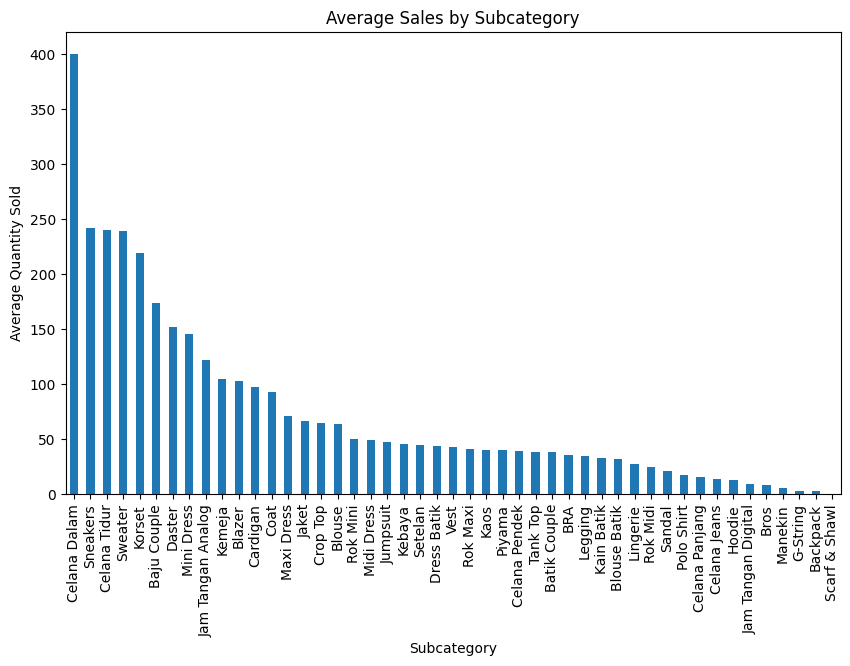

In [ ]:
# Average sales by subcategory
subcategory_sales = df.groupby('subcategory')['quantity_sold'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
subcategory_sales.plot(kind='bar')
plt.title('Average Sales by Subcategory')
plt.xlabel('Subcategory')
plt.ylabel('Average Quantity Sold')
plt.xticks(rotation=90)
plt.show()


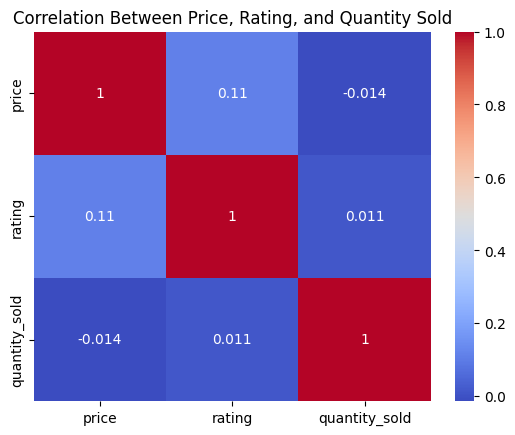

In [ ]:
# Correlation matrix
corr = df[['price', 'rating', 'quantity_sold']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Price, Rating, and Quantity Sold')
plt.show()


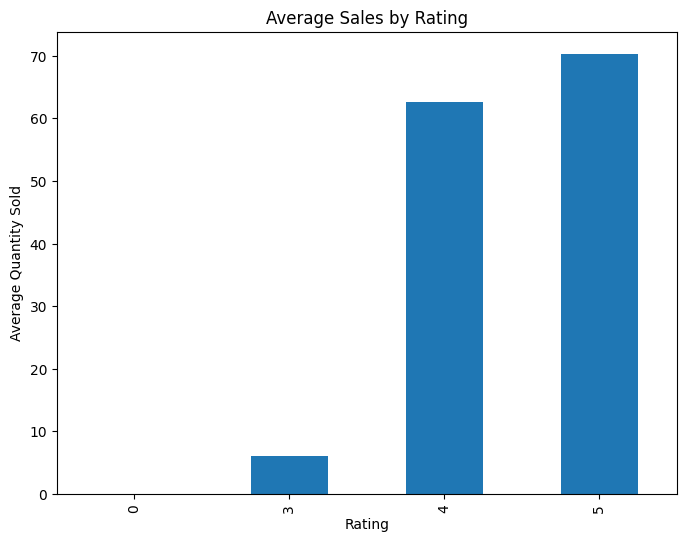

In [ ]:
# Average sales by rating
rating_sales = df.groupby('rating')['quantity_sold'].mean()
plt.figure(figsize=(8, 6))
rating_sales.plot(kind='bar')
plt.title('Average Sales by Rating')
plt.xlabel('Rating')
plt.ylabel('Average Quantity Sold')
plt.show()


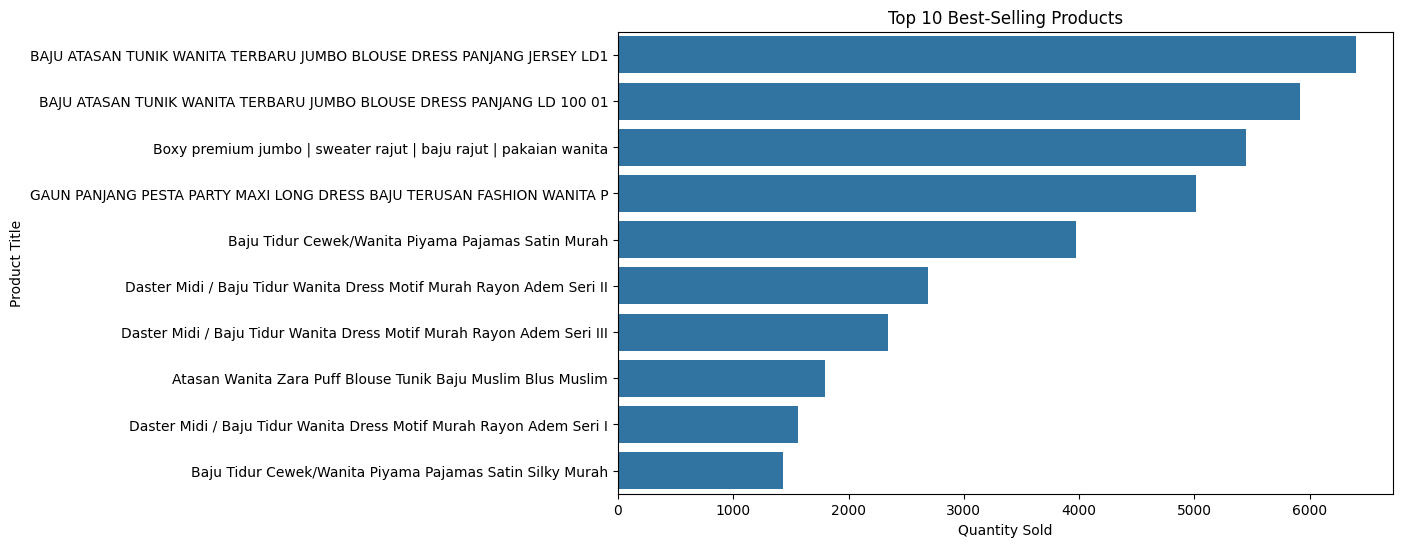

In [ ]:
# Top 10 best-selling products
top_products = df.nlargest(10, 'quantity_sold')[['title', 'quantity_sold']]
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity_sold', y='title', data=top_products)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Title')
plt.show()


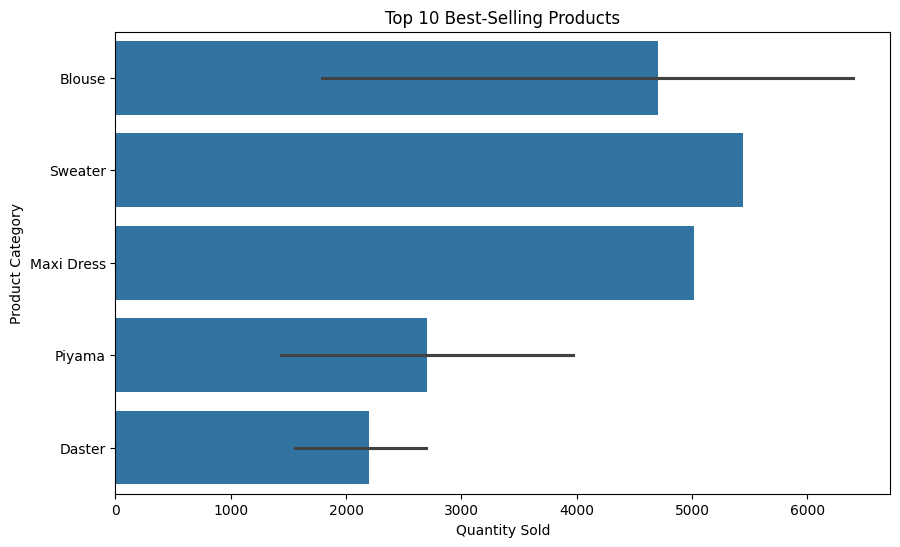

In [ ]:
# Top 10 best-selling products
top_products = df.nlargest(10, 'quantity_sold')[['subcategory', 'quantity_sold']]
plt.figure(figsize=(10, 6))
sns.barplot(x='quantity_sold', y='subcategory', data=top_products)
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Quantity Sold')
plt.ylabel('Product Category')
plt.show()

In [ ]:
# Summary of sales performance by subcategory
subcategory_sales = df.groupby('subcategory')['quantity_sold'].agg(['sum', 'mean', 'count']).reset_index()
subcategory_sales.columns = ['subcategory', 'total_sold', 'avg_sold', 'product_count']

# Correlation analysis: Price, Discount, and Sales
correlation_data = df[['price', 'presentase_diskon', 'quantity_sold', 'rating']].corr()

# Average quantity sold by rating
rating_sales = df.groupby('rating')['quantity_sold'].mean().reset_index()

subcategory_sales, correlation_data, rating_sales

(           subcategory  total_sold    avg_sold  product_count
 0                  BRA         285   35.625000              8
 1             Backpack           5    2.500000              2
 2          Baju Couple        2259  173.769231             13
 3         Batik Couple         497   38.230769             13
 4               Blazer        4719  102.586957             46
 5               Blouse       78927   63.650806           1240
 6         Blouse Batik        4597   31.486301            146
 7                 Bros          48    8.000000              6
 8             Cardigan        5522   96.877193             57
 9         Celana Dalam        1201  400.333333              3
 10        Celana Jeans          41   13.666667              3
 11      Celana Panjang          60   15.000000              4
 12       Celana Pendek         234   39.000000              6
 13        Celana Tidur        2160  240.000000              9
 14                Coat        1763   92.789474        

# Feature Engineering

In [ ]:
#Menghitung profit tiap produk
df['revenue'] = df['price'] * df['quantity_sold']

In [ ]:
df['log_revenue'] = np.log1p(df['price'] * df['quantity_sold'])

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['jumlah_view'] = label_encoder.fit_transform(df['jumlah_view'])

In [ ]:
# Menganalisis seberapa efektif produk menghasilkan pendapatan dari setiap view
# Mengganti jumlah_view yang 0 dengan 1
df['jumlah_view_adjusted'] = df['jumlah_view'].apply(lambda x: x if x > 0 else 1)

# Menghitung Revenue per View dengan jumlah_view_adjusted
df['Revenue_per_View'] = df['revenue'] / df['jumlah_view_adjusted']

In [ ]:
# Menghitung biaya produksi atau biaya per unit
# Asumsikan biaya setiap produk adalah 70% dari harga jual
df['cost'] = df['price'] * 0.7 * df['quantity_sold']

In [ ]:
#Menghitung seberapa banyak keuntungan yang dihasilkan dari penjualan suatu produk dibandingkan dengan harganya
df['Profit_Margin'] = df.apply(lambda row: ((row['revenue'] - row['cost']) / row['revenue']) * 100 if row['revenue'] > 0 else 0, axis=1)

In [ ]:
df

,category,city,gold_merchant,image_url,jumlah_review,jumlah_view,location,presentase_diskon,price,product_id,...,subcategory,title,url,z_score,revenue,log_revenue,jumlah_view_adjusted,Revenue_per_View,cost,Profit_Margin
0,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,954,0,Kota Bandung,0,55000,284008675,...,Blouse,Baju Atasan Blouse Wanita Baju Muslim Blus Mus...,https://www.tokopedia.com/openols/baju-atasan-...,-0.274800,0,0.000000,1,0.0,0.0,0.0
1,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,761,0,Kota Bandung,0,65000,283976385,...,Blouse,Baju Atasan Wanita Magali Tunik Blouse Baju Mu...,https://www.tokopedia.com/openols/baju-atasan-...,-0.274800,0,0.000000,1,0.0,0.0,0.0
2,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,439,0,Jakarta,0,59000,316717554,...,Piyama,Piyama Black Cat Daster Baju Tidur Wanita Dewasa,https://www.tokopedia.com/wjozfashion/piyama-b...,-0.274800,0,0.000000,1,0.0,0.0,0.0
3,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,909,0,Kota Bandung,0,59000,270887764,...,Blouse,Tunik Atasan Wanita Blouse Baju Muslim Blus Mu...,https://www.tokopedia.com/openols/tunik-atasan...,-0.274800,0,0.000000,1,0.0,0.0,0.0
4,Fashion Wanita,Kota Bandung,True,https://ecs7.tokopedia.net/img/cache/200-squar...,614,0,Kota Bandung,0,55000,284010469,...,Blouse,Atasan Wanita Ellena Peplum Blouse Tunik Baju ...,https://www.tokopedia.com/openols/atasan-wanit...,-0.274800,0,0.000000,1,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4498,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,0,131500,366339754,...,Sweater,Couple Sweater Pasangan Wanita Pria Baju Atasa...,https://www.tokopedia.com/adelaaloysius1/coupl...,0.117391,13018500,16.381882,1,13018500.0,9112950.0,30.0
4499,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,33,0,Jakarta,0,239900,363772675,...,Jumpsuit,Jumpsuit Jumbo Wanita Bigsize Big Size Panjang...,https://www.tokopedia.com/tokowislywis/jumpsui...,0.117391,23750100,16.983097,1,23750100.0,16625070.0,30.0
4500,Fashion Wanita,Jakarta,False,https://ecs7.tokopedia.net/img/cache/200-squar...,31,0,Jakarta,0,105000,358247047,...,Kemeja,Baju Kemeja Wanita Jumbo Bigsize Big Size Leng...,https://www.tokopedia.com/strongwoman/baju-kem...,0.117391,10395000,16.156836,1,10395000.0,7276500.0,30.0
4501,Fashion Wanita,Kota Tangerang Selatan,True,https://ecs7.tokopedia.net/img/cache/200-squar...,18,0,Kota Tangerang Selatan,0,50000,335503058,...,Daster,Daster Tanktop Dress Tanktop Baju Tidur Wanita,https://www.tokopedia.com/mamanacaca/daster-ta...,0.117391,4950000,15.414898,1,4950000.0,3465000.0,30.0


# Modelling ( Machine Learning )

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Handle missing values
data = df.dropna(subset=['price', 'rating', 'quantity_sold'])

# One-hot encode 'subcategory'
encoder = OneHotEncoder(sparse_output=False)
subcategory_encoded = encoder.fit_transform(data[['subcategory']])

# Convert the encoded categories into a DataFrame
subcategory_encoded_df = pd.DataFrame(subcategory_encoded, columns=encoder.get_feature_names_out(['subcategory']))

# Concatenate the encoded subcategories with the original data
df = pd.concat([data.reset_index(drop=True), subcategory_encoded_df], axis=1)

In [ ]:
# Features and target variable
X = df[['price', 'rating', 'Revenue_per_View', 'Profit_Margin', 'revenue', 'quantity_sold'] + list(subcategory_encoded_df.columns)]
y = df['log_revenue']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 1.3688989805154148
R-squared: 0.96327341492519


In [ ]:
# Display model coefficients
feature_importance = dict(zip(X.columns, model.coef_))
sorted(feature_importance.items(), key=lambda x: abs(x[1]), reverse=True)

[('subcategory_Sneakers', 1.8321837801546386),
 ('subcategory_G-String', -1.3299898747518517),
 ('subcategory_Bros', -1.1931390682645242),
 ('subcategory_Tank Top', -1.1163178591610385),
 ('subcategory_Backpack', -1.0303302542470907),
 ('subcategory_Celana Dalam', 0.9916016816941114),
 ('subcategory_Jam Tangan Digital', -0.8033141314210683),
 ('subcategory_Kain Batik', 0.7540384395570657),
 ('subcategory_Rok Mini', -0.7119367423221165),
 ('subcategory_Polo Shirt', -0.7077183804703349),
 ('subcategory_Crop Top', 0.6966982746250576),
 ('subcategory_Rok Maxi', 0.6657707602819074),
 ('subcategory_Kemeja', 0.4951738059176858),
 ('subcategory_Kebaya', 0.48662523270025226),
 ('subcategory_Midi Dress', 0.4857875740047952),
 ('subcategory_Batik Couple', 0.4714763207249737),
 ('Profit_Margin', 0.4666321219099783),
 ('subcategory_Jam Tangan Analog', 0.44833118293378993),
 ('subcategory_Vest', 0.44039092615613784),
 ('subcategory_Setelan', -0.40595234485567033),
 ('subcategory_Jumpsuit', 0.3721650

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate MSE and R-squared
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.006316861646431194
R-squared: 0.9998305230992457


Here are the key insights from the analysis:
1. Sales Performance by Subcategory:
*   Blouse is the highest-selling subcategory with a total of 78,927 units sold across 1,240 products, averaging 63.65 units per product.
* Sweater also performs well, with a total of 41,879 units sold, averaging 239.31 units per product.
* Subcategories like Mini Dress, Celana Tidur, and Sneakers have high average sales per product, suggesting strong demand.
2. Correlation Between Price, Discount, and Sales:
* The correlation between price and quantity sold is slightly negative (-0.014), suggesting that price may not have a strong impact on sales.
* There is no significant data available for discounts, which might indicate that discounts are not widely used in this dataset.
3. Impact of Ratings on Sales:
* Products with a rating of 5 have the highest average sales (70.31 units), followed by products with a rating of 4 (62.68 units).
* Lower ratings (3 and below) correlate with significantly fewer sales, emphasizing the importance of maintaining high product ratings for better performance.
Suggestions to Maintain Quality and Increase Profit:
1. Focus on High-Performing Subcategories: Prioritize subcategories like Blouses, Sweaters, and Dresses, which consistently show high sales. Consider expanding these product lines or introducing new variations to capitalize on their demand.
2. Improve Product Ratings: As high ratings are directly linked to better sales, it's essential to ensure customer satisfaction through improved quality checks, customer feedback loops, and product enhancements for low-rated items.
3. Price Sensitivity Analysis: Since price doesn't have a strong negative correlation with sales, you could experiment with slight price increases in popular subcategories to maximize profits without significantly impacting demand.
4. Evaluate the Role of Discounts: Since there's limited data on the use of discounts, consider introducing targeted promotions or discounts in underperforming categories to boost sales.